In [1]:
from neuralprophet import NeuralProphet
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_pickle('../Data/ELC_12-14_15min_dropped.pkl')
df = df.resample('1D').mean()
df = df.loc['2012-01-01':'2014-12-31']
df

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,...,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369
2012-01-01,7.493989,26.293329,21.043486,119.833119,57.779204,259.805764,5.682663,232.996633,60.581524,66.281834,...,390.927978,271.129644,29533.684211,2097.357317,2127.272727,18.060797,10.409288,433.325632,51.647483,695.539435
2012-01-02,10.681049,26.834400,4.986606,128.006436,64.723069,243.582589,4.127803,293.806117,87.357955,57.885305,...,543.973867,320.187961,36400.000000,2514.196554,2549.715909,77.995980,23.472547,568.252488,147.450612,805.252627
2012-01-03,10.839679,29.960882,8.072690,122.967480,67.251016,233.413938,3.798050,292.262907,81.220862,85.091846,...,579.507036,250.111527,35885.416667,2401.503165,2861.742424,81.567797,27.489272,578.486245,162.632165,836.792827
2012-01-04,11.394882,26.145389,14.262960,121.845359,69.296240,237.444196,3.874600,284.652076,81.038753,73.756720,...,530.895925,299.443850,35635.416667,2569.356540,2851.325758,78.213277,22.771601,554.479441,149.554814,798.234360
2012-01-05,14.078363,27.508594,41.304663,121.803015,66.501524,220.920139,3.450631,274.901796,81.931090,80.421147,...,533.888432,274.907804,36235.416667,2436.225387,2712.357955,76.583551,25.611956,588.024949,195.673344,831.699047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-27,2.207593,22.352122,1.846221,155.678354,76.753049,230.499752,5.252497,299.487935,62.153992,58.523746,...,360.517178,294.343326,32872.916667,2285.249648,2717.803030,87.910148,7.271553,557.095040,81.489983,739.254949
2014-12-28,2.366223,22.203947,1.574718,149.242039,70.591972,209.604415,4.475221,263.082211,53.321678,49.943996,...,421.086897,300.157626,34084.375000,2299.182489,2682.054924,85.098870,5.753852,478.279558,45.892460,688.912818
2014-12-29,2.590948,23.048542,1.674269,146.532012,74.987297,237.754216,5.735350,315.481201,69.766171,66.017025,...,431.549251,300.261718,32386.458333,2154.711674,2803.030303,87.896567,12.019700,561.759219,134.529772,769.611437
2014-12-30,2.419099,22.974455,1.719519,148.860942,74.885671,248.759921,6.112210,321.969697,67.580857,67.596326,...,370.031524,296.752320,30253.125000,2126.318565,2745.975379,110.576923,9.295153,586.817749,166.631886,770.314027


In [3]:
df_avg_1h = []
for i in tqdm(range(df.shape[0])):
    df_avg_1h.append(df.iloc[i,:].sum()/len(df.iloc[i,:].dropna()))
df_avg_1h = pd.DataFrame(df_avg_1h,index=df.index,columns=['avg_1h'])
df_avg_1h

100%|██████████| 1096/1096 [00:00<00:00, 3132.64it/s]


,avg_1h
2012-01-01,399.521686
2012-01-02,590.506390
2012-01-03,591.221033
2012-01-04,593.381152
2012-01-05,595.020094
...,...
2014-12-27,546.376092
2014-12-28,540.622141
2014-12-29,542.862690
2014-12-30,541.107932


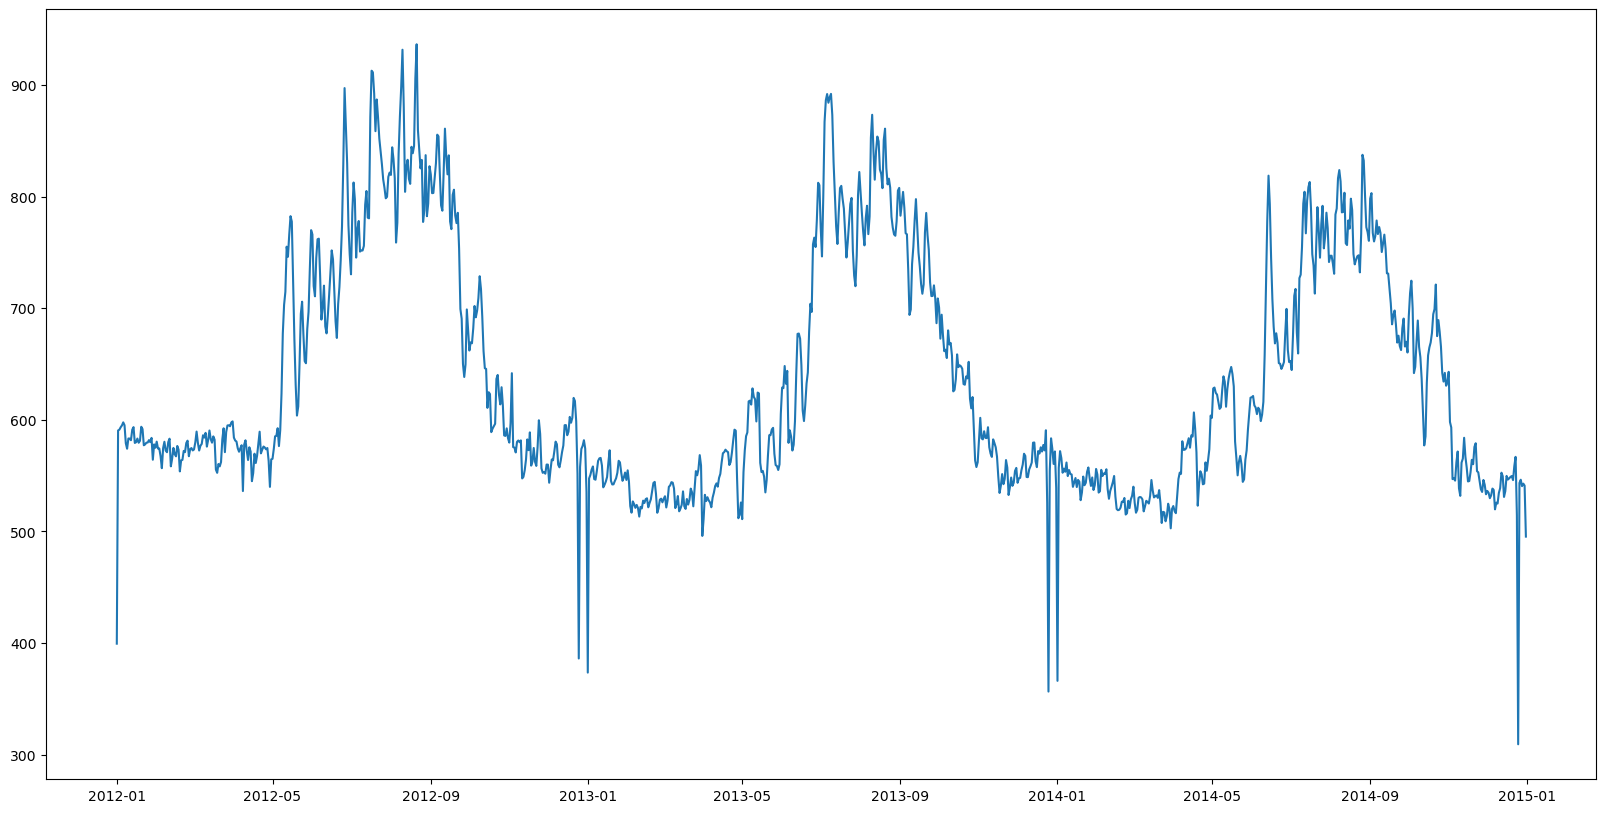

In [4]:
plt.figure(figsize=(20,10))
plt.plot(df_avg_1h)

In [5]:
df_avg_1h['ds'] = df_avg_1h.index
df_avg_1h['y'] = df_avg_1h['avg_1h']
df_avg_1h = df_avg_1h.drop('avg_1h',axis=1)
df_avg_1h

,ds,y
2012-01-01,2012-01-01,399.521686
2012-01-02,2012-01-02,590.506390
2012-01-03,2012-01-03,591.221033
2012-01-04,2012-01-04,593.381152
2012-01-05,2012-01-05,595.020094
...,...,...
2014-12-27,2014-12-27,546.376092
2014-12-28,2014-12-28,540.622141
2014-12-29,2014-12-29,542.862690
2014-12-30,2014-12-30,541.107932


In [6]:
training_x = df_avg_1h.iloc[:int(len(df_avg_1h)*0.8)]
val_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.8):int(len(df_avg_1h)*0.9)]
testing_x = df_avg_1h.iloc[int(len(df_avg_1h)*0.9):]

In [7]:
m = NeuralProphet(n_changepoints=15, 
                  n_forecasts= 14,
                  changepoints_range=0.5,
                  growth='linear',
                  seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  num_hidden_layers=25,
                  d_hidden=256, 
                  epochs=300, 
                  batch_size=64, 
                  normalize=True,
                  impute_missing=True,
                  learning_rate=0.8,
                  #loss_func='Huber',
                  loss_func='MSELoss',
                  optimizer='AdamW',
                  #optimizer='SGD',
                  collect_metrics=True,
                  )
m.add_country_holidays(country_name='PT')
metric = m.fit(training_x, validation_df=val_x, freq='auto')

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
  0%|          | 0/300 [00:00<?, ?it/s]WARNING - (py.warnings._showwarnmsg) - /Users/alexzhou/miniconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([110])) that is different to the input size (torch.Size([110, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_

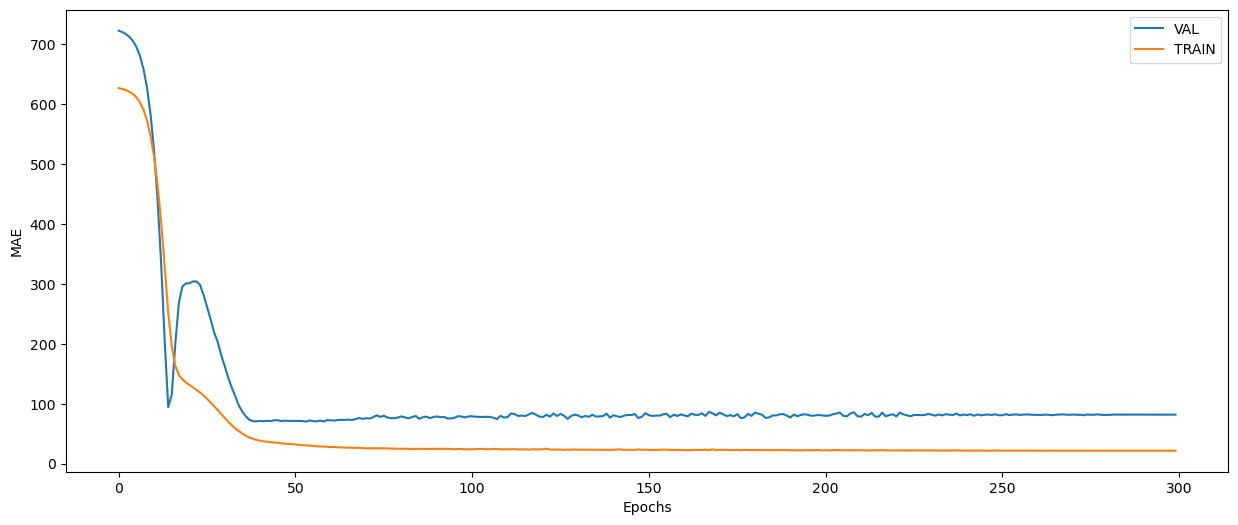

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(metric['MAE_val'], label='VAL')
plt.plot(metric['MAE'], label='TRAIN')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

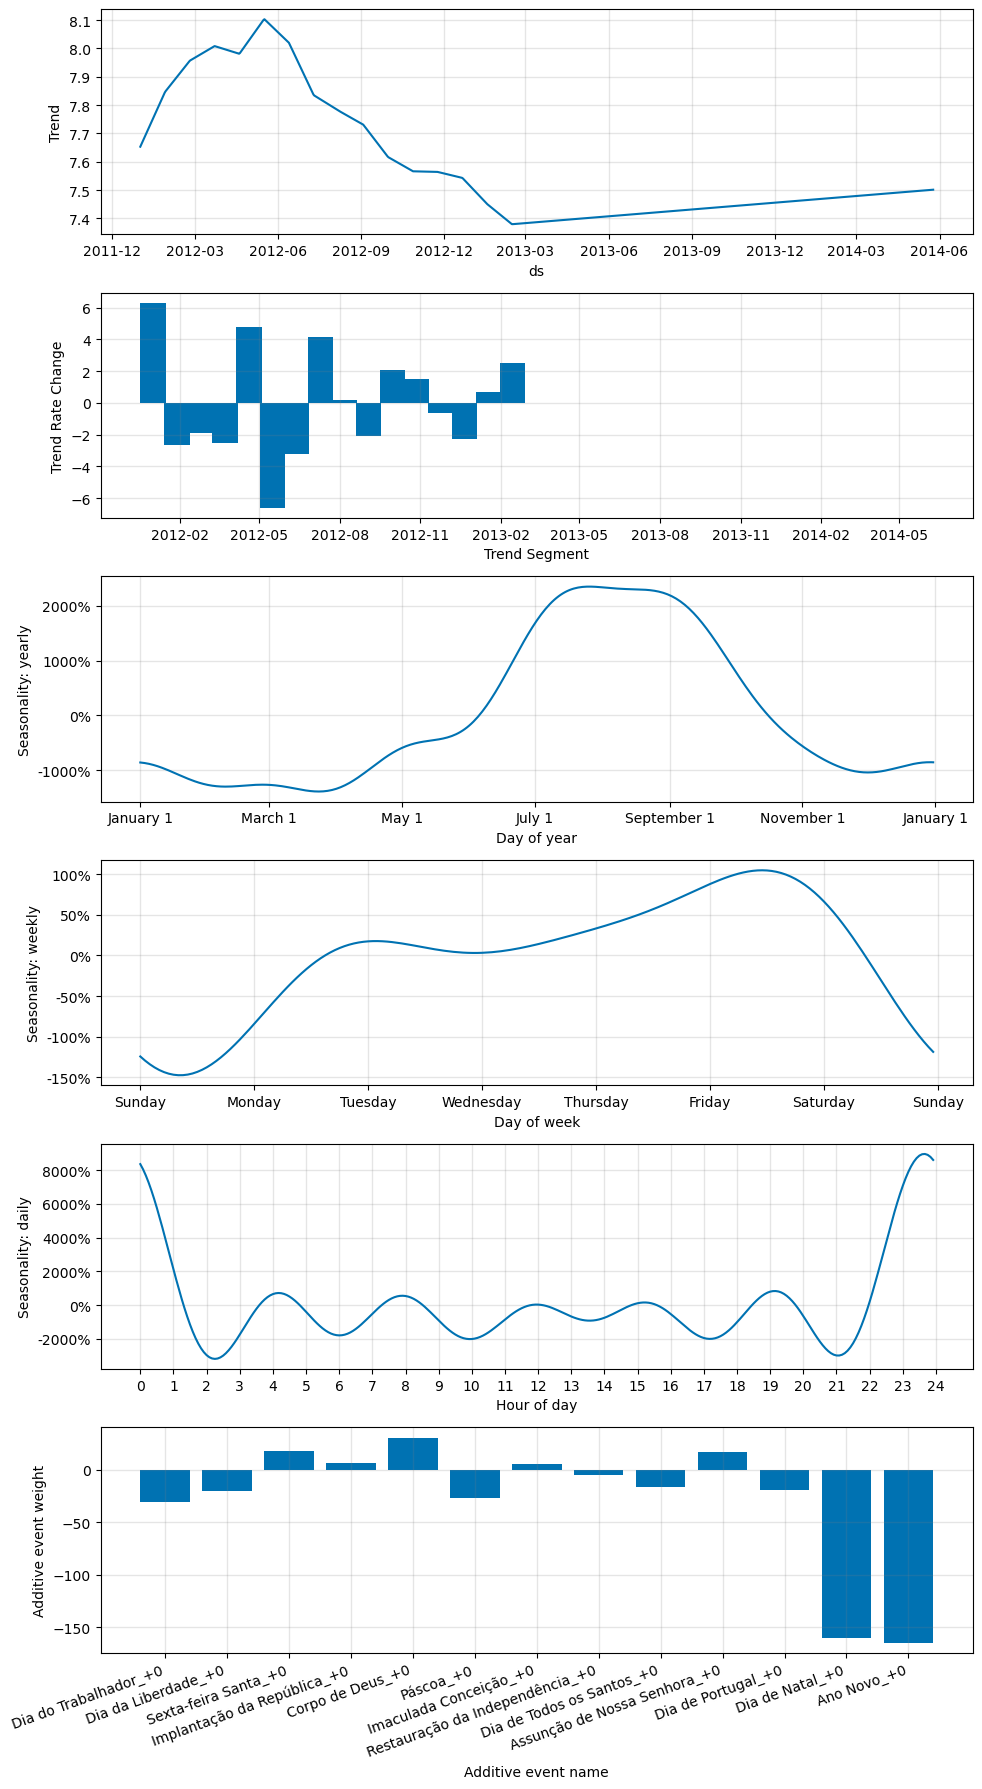

In [9]:
fig_param = m.plot_parameters()
fig_param.show()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


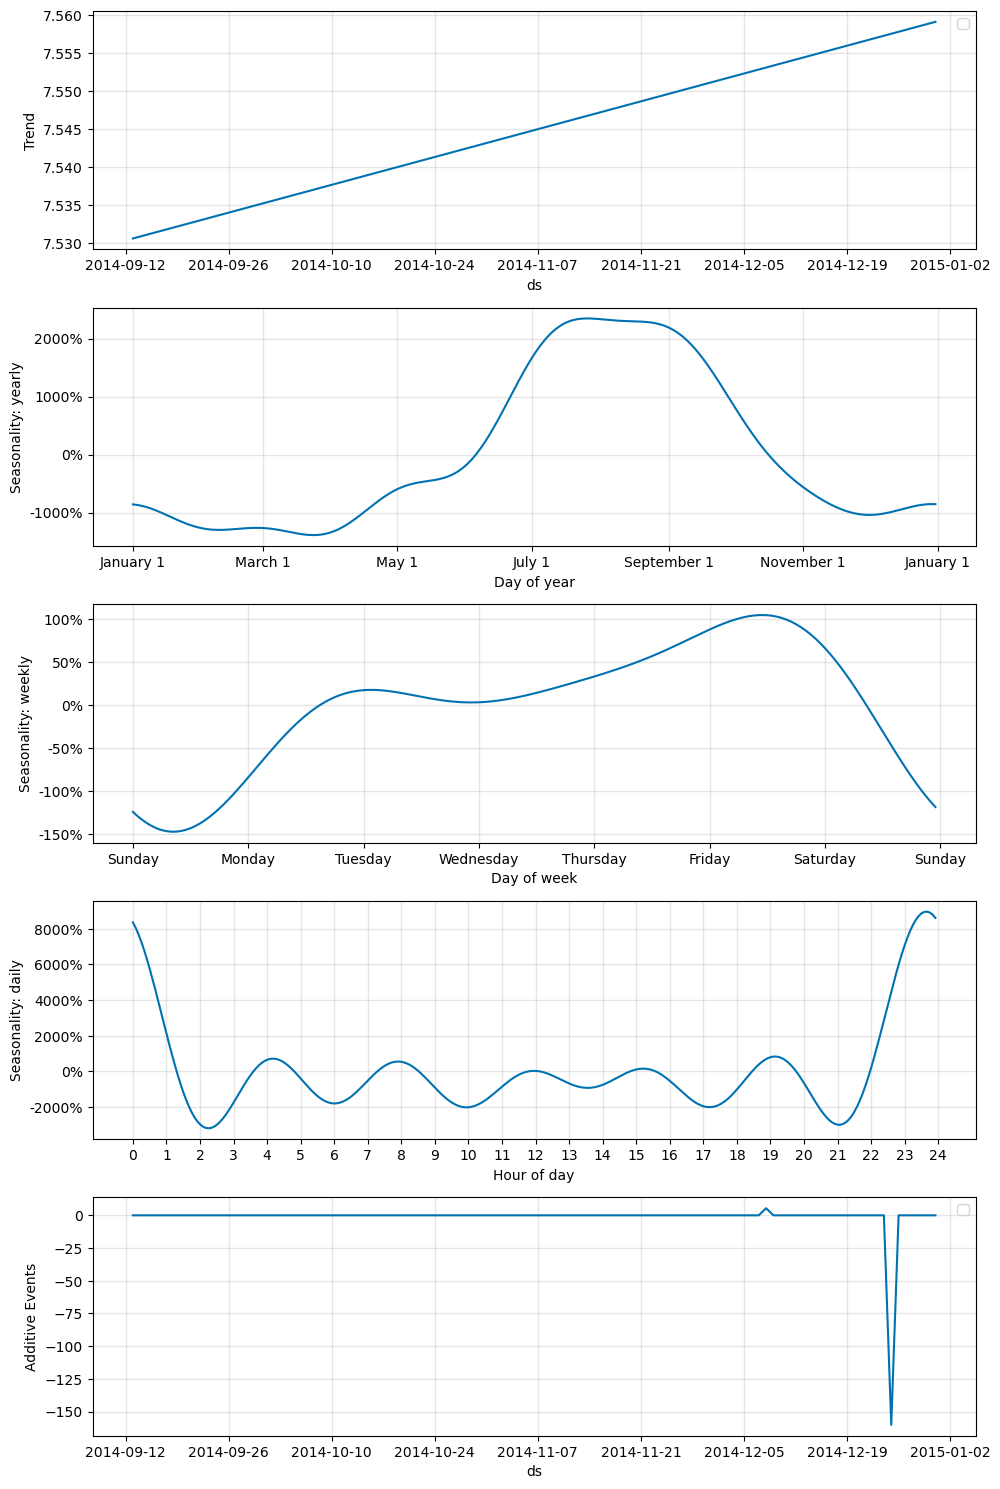

In [10]:
forecast = m.predict(testing_x)
fig = m.plot_components(forecast)
fig.show()

MAPE:  0.05516240731458095


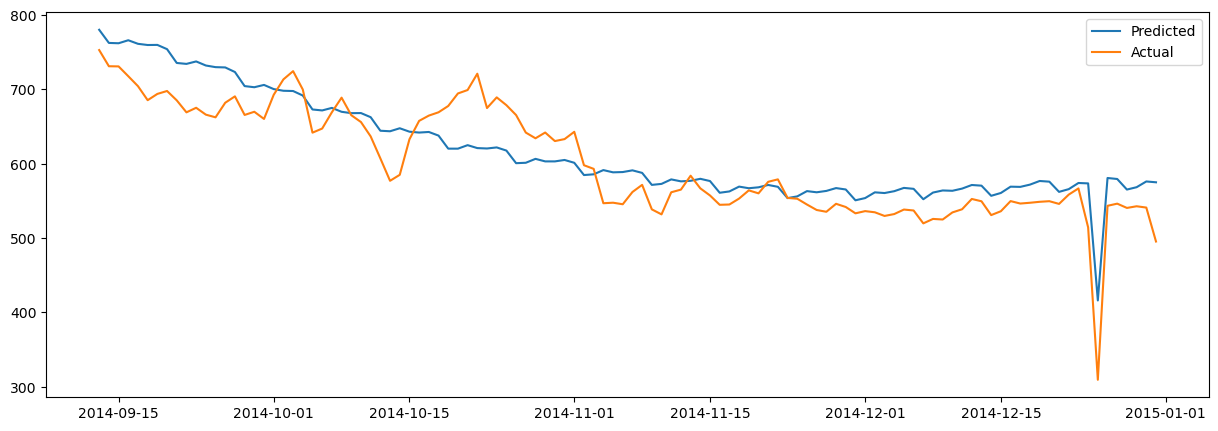

In [11]:
plt.figure(figsize=(15,5))
plt.plot(forecast['ds'],forecast['yhat1'], label='Predicted')
plt.plot(testing_x['ds'],testing_x['y'], label='Actual')
plt.legend()
plt.plot()
print('MAPE: ', mean_absolute_percentage_error(testing_x['y'], forecast['yhat1']))

# Bayes Optimization 

In [12]:
from bayes_opt import BayesianOptimization

In [13]:
m

In [14]:
def nprophet_objective(n_lags, n_forecasts, num_hidden_layers, d_hidden):
    model = NeuralProphet(n_changepoints=15, 
                  # n_forecasts= 14,
                  changepoints_range=0.5,
                  growth='linear',
                  seasonality_mode='multiplicative', 
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                #   num_hidden_layers=25,
                #   d_hidden=256, 
                #   epochs=300, 
                  batch_size=64, 
                  normalize=True,
                #   learning_rate=0.8,
                #   loss_func='Huber',
                  loss_func='MSELoss',
                  optimizer='AdamW',
                  collect_metrics=True,
                  )
    model.add_country_holidays(country_name='PT')
    model.fit(training_x)
    print("finished training")
    
    forecast = model.predict(val_x)
    print("finished predicting")
    mape = mean_absolute_percentage_error(val_x['y'],forecast['yhat1'])
    return -mape

In [15]:
bounds = {
    'n_lags': (0, 200),
    'n_forecasts': (0, 100),
    'num_hidden_layers': (2, 50),
    'd_hidden': (128, 512)
}

# Initialize the Bayesian optimization
optimizer = BayesianOptimization(
    f=nprophet_objective,
    pbounds=bounds,
    random_state=42,
    verbose=1
)

optimizer.maximize(init_points=10, n_iter=20)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

|   iter    |  target   | d_hidden  | n_fore... |  n_lags   | num_hi... |
-------------------------------------------------------------------------


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.25E+00, min: 1.48E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.25E+00, min: 1.48E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.39E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 29.59it/s, MSELoss=1.02e+3, MAE=22.7, RMSE=31.6, Loss=710, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 1.06E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 31.15it/s, MSELoss=1e+3, MAE=22.4, RMSE=31.5, Loss=702, RegLoss=0]     
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting
| 2         | -0.05914  | 187.9     | 15.6      | 11.62     | 43.58     |


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.45E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 31.32it/s, MSELoss=977, MAE=22, RMSE=31, Loss=683, RegLoss=0]          
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 1.06E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 1.06E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.44E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 30.98it/s, MSELoss=1.05e+3, MAE=23.2, RMSE=32.2, Loss=737, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting
| 4         | -0.05877  | 447.7     | 21.23     | 36.36     | 10.8      |


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 30.52it/s, MSELoss=1.01e+3, MAE=22.5, RMSE=31.5, Loss=703, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E+00, min: 1.25E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E+00, min: 1.25E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.82E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 31.23it/s, MSELoss=1.02e+3, MAE=22.8, RMSE=31.7, Loss=716, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting
| 6         | -0.05853  | 363.0     | 13.95     | 58.43     | 19.59     |


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.48E+00, min: 1.40E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.48E+00, min: 1.40E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.03E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 31.04it/s, MSELoss=1.01e+3, MAE=22.7, RMSE=31.6, Loss=708, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting
| 7         | -0.0585   | 303.1     | 78.52     | 39.93     | 26.68     |


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.44E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 30.69it/s, MSELoss=1.05e+3, MAE=23.1, RMSE=32.1, Loss=735, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 31.13it/s, MSELoss=1e+3, MAE=22.4, RMSE=31.5, Loss=701, RegLoss=0]     
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 26.23it/s, MSELoss=1e+3, MAE=22.4, RMSE=31.4, Loss=702, RegLoss=0]     
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


finished training
finished predicting


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.44E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:09<00:00, 21.98it/s, MSELoss=1.05e+3, MAE=23.2, RMSE=32.2, Loss=737, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.44E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 30.14it/s, MSELoss=1.05e+3, MAE=23.1, RMSE=32, Loss=735, RegLoss=0]    
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 25.78it/s, MSELoss=1.01e+3, MAE=22.4, RMSE=31.4, Loss=702, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 1.06E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.44E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 29.42it/s, MSELoss=1.06e+3, MAE=23.2, RMSE=32.1, Loss=738, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting
| 14        | -0.05849  | 317.1     | 79.82     | 43.97     | 21.2      |


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 27.74it/s, MSELoss=1.01e+3, MAE=22.5, RMSE=31.5, Loss=703, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 26.78it/s, MSELoss=1.01e+3, MAE=22.5, RMSE=31.6, Loss=703, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.94E-01, min: 1.06E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.94E-01, min: 1.25E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.31E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 28.91it/s, MSELoss=1.03e+3, MAE=22.9, RMSE=31.9, Loss=722, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.94E-01, min: 1.25E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.94E-01, min: 1.25E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.31E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:08<00:00, 24.90it/s, MSELoss=1.03e+3, MAE=22.9, RMSE=31.8, Loss=722, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.39E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.39E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:08<00:00, 25.14it/s, MSELoss=1.01e+3, MAE=22.5, RMSE=31.5, Loss=704, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.55E-01, min: 1.06E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 1.06E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.03E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:08<00:00, 24.77it/s, MSELoss=1e+3, MAE=22.4, RMSE=31.3, Loss=700, RegLoss=0]     
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.39E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.39E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.07E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 26.62it/s, MSELoss=1.08e+3, MAE=23.6, RMSE=32.4, Loss=752, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting
| 21        | -0.058    | 374.6     | 2.498     | 38.14     | 18.79     |


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.70E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:08<00:00, 23.33it/s, MSELoss=1.01e+3, MAE=22.5, RMSE=31.5, Loss=704, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.45E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 26.18it/s, MSELoss=977, MAE=21.9, RMSE=31, Loss=683, RegLoss=0]        
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


finished training
finished predicting


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E+00, min: 1.48E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E+00, min: 1.48E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.82E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 27.53it/s, MSELoss=1.02e+3, MAE=22.7, RMSE=31.6, Loss=715, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.91E+00, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.45E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:06<00:00, 29.49it/s, MSELoss=980, MAE=22, RMSE=31, Loss=685, RegLoss=0]          
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E+00, min: 1.25E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.06E+00, min: 1.25E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.82E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:11<00:00, 17.53it/s, MSELoss=1.02e+3, MAE=22.8, RMSE=31.4, Loss=716, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


finished training


INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.
ERROR - (NP.df_utils.get_normalization_params) - Normalization True not defined.


finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 1.06E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.44E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 26.38it/s, MSELoss=1.06e+3, MAE=23.2, RMSE=32.1, Loss=738, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.39E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.39E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.07E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 28.77it/s, MSELoss=1.07e+3, MAE=23.5, RMSE=32.4, Loss=750, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.38E-01, min: 8.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 3.44E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 27.53it/s, MSELoss=1.06e+3, MAE=23.3, RMSE=32.2, Loss=740, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.886% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization t

finished training
finished predicting


INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 202


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.48E+00, min: 1.75E+00


  0%|          | 0/124 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.48E+00, min: 1.75E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.03E-01
Epoch[202/202]: 100%|██████████| 202/202 [00:07<00:00, 26.13it/s, MSELoss=1.01e+3, MAE=22.6, RMSE=31.5, Loss=707, RegLoss=0]  
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.091% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


finished training
finished predicting


In [ ]:
best_params = optimizer.max['params']

In [ ]:
# Extract the best hyperparameters
best_params = optimizer.max['params']
print("finish searching")

# Train and evaluate the model with the best hyperparameters
best_model = NeuralProphet(
    n_lags=best_params['n_lags'],
    n_forecasts=best_params['n_forecasts'],
    num_hidden_layers=best_params['num_hidden_layers'],
    n_forecasts=best_params['n_forecasts']
)

best_model.fit(pd.concat([training_x, val_x]))
print("finish fitting")

best_forecast = best_model.predict(testing_x[['ds']])
best_mape = mean_absolute_percentage_error(testing_x['y'], best_forecast['yhat'])

print(f"Best hyperparameters: {best_params}")
print(f"Best mape: {best_mape}")

In [ ]:
future = testing_x[['ds']]
forecast = m.predict(future)
plt.figure(figsize=(20,10))
plt.plot(testing_x['y'],label='Actual')
plt.plot(forecast['ds'],forecast['yhat'],label='Predicted')

In [ ]:
# split testing data into three parts
test1 = testing_x.iloc[:int(len(testing_x)/3)].reset_index(drop=True)
test2 = testing_x.iloc[int(len(testing_x)/3):int(len(testing_x)*2/3)].reset_index(drop=True)
test3 = testing_x.iloc[int(len(testing_x)*2/3):].reset_index(drop=True)
mape_test = []
err = pd.DataFrame(columns=['test1','test2','test3'])
forecast1 = m.predict(test1[['ds']])
err['test1'] = test1['y'] - forecast1['yhat']
mape_test.append(mean_absolute_percentage_error(test1['y'], forecast1['yhat']))
print("MAPE test1: ", mean_absolute_percentage_error(test1['y'], forecast1['yhat']))

forecast2 = m.predict(test2[['ds']])
err['test2'] = test2['y'] - forecast2['yhat']
mape_test.append(mean_absolute_percentage_error(test2['y'], forecast2['yhat']))
print("MAPE test2: ", mean_absolute_percentage_error(test2['y'], forecast2['yhat']))

forecast3 = m.predict(test3[['ds']])
err['test3'] = test3['y'] - forecast3['yhat']
mape_test.append(mean_absolute_percentage_error(test3['y'], forecast3['yhat']))
print("MAPE test3: ", mean_absolute_percentage_error(test3['y'], forecast3['yhat']))

plt.boxplot(err)
plt.xlabel('Test')
plt.ylabel('Error')
plt.show()

plt.plot([1,2,3],mape_test)